# Class 12 - MNIST (Modified National Institute of Standards and Technology)

## The dataset

The MNIST dataset is one of the most popular datasets used in machine learning. It is also used typically as a popular benchmark for new algorithms. Today, we want to see how our learned algorithms perform on this real dataset.

The MNIST dataset contains handwritten digits together with their labels written by 500 different people, 50% of whome were high school studets and the other 50% were employees from the US Census Bureau. It was constructed by Yann LeCun and is publicly available on his webpage [here](http://yann.lecun.com/exdb/mnist/index.html). There you can also find some interesting and cutting edge results on machine learning algorithms used for image classification.

More precisely, the MNIST dataset consists of the following four parts:
- Training set images: 60000 samples (training-images-idx3-ubyte.gz)
- Training set labels: 60000 labels (training-labels-idx1-ubyte.gz)
- Test set images: 10000 samples (t10k-images-idx3-ubyte.gz)
- Test set labels: 10000 labels (t10k-images-idx1-ubyte.gz)

As images are generally large in size the data are compressed and stored in a specific file format called byte format. Hence, some extra effort is needed to handle these.

Each image in the dataset consists of $28*28=784$ pixel describing the grayscales with an integer ranging from 0 to 255. These values are stored in a matrix row-wise.

## Loading the data and transforming them into csv files

Let us start by loading the dataset. Be careful: After downloading them from the webpage of Yann LeCun you still need to unzip them! 

In [1]:
import os
import struct # allows to convert byte format integers
import numpy as np

def load_mnist(path, kind='train'): # Load MNIST data from 'path'
    labels_path = os.path.join(path, '%s-labels.idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images.idx3-ubyte' % kind)
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8)) # reads header of file which is a description of the file protocol
        labels = np.fromfile(lbpath, dtype=np.uint8) # reads data
    
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.int8).reshape(len(labels), 784)
        images = np.mod(images, 255) # convert negative integers to integer between 0 and 255
    
    return images, labels


x_train, y_train = load_mnist('', kind='train')
x_test, y_test = load_mnist('', kind='t10k')

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Let's have a look at some of the images.

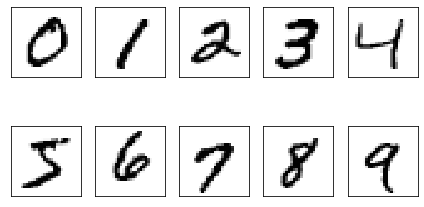

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train==i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

For comparison, let us also plot multiple images of the same digit to investigate the different handwritings.

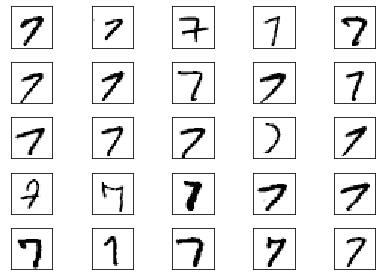

In [4]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = x_train[y_train==7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Techniques for multiclass classification

Classification with more than two classes can be computationally quite challanging depending on the algorithm used. While some ML algorithms allow for a straightforward generalization (e.g. the k-nearest neighbours algorithm), others are much more rigid. Luckily, there exists a well-known workaround to solve multiclass-classification nevertheless: we reduce to the binary classification case.

Assume we have $k$ different classes we want to learn.

### One vs. all (one vs. rest)

Perform $k$ different binary classifications, each of which discriminates between one class and the rest of the classes. In more detail, for $i∈\{1,\dotsc,k\}$, consider the training set
$$S_i = \{(x_j, (-1)^{\delta_{y_j \ne i}}) \vert (x_j,y_j)∈S\}.$$
For each i, we learn a binary predictor $h_i$ which should satisfy $h_i(x)=1$ if and only if $x$ belongs to class $i$. The multiclass problem is then solved by predicting according to the rule
$$h(x) = \text{argmax}_{i∈\{1,\dotsc,k\}} h_i(x).$$
In case there are several binary hypothesis predicting $1$, we try to use additional information about the confidence of each prediction (e.g. the distance to the decision boundary in a SVM).

### One vs. one (all pairs)

Perform $k(k-1)/2$ binary classifications, each of which discriminates between a pair of classes. In more detail, fix $i,j∈\{1,…,k\}$ and perform a binary classification between all the data points with label either $i$ or $j$. Finally, the multiclass classifier predicts by using the label with the highest number of "wins".

## How to proceed?